In [129]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

from scipy import optimize
from scipy import stats
from scipy import special
from iminuit import Minuit, cost



In [130]:
def uniform(xe, s):
    return n * s * stats.uniform.cdf(xe, xe[0], xe[-1])

def fit(c):
    m = Minuit(c, s=0) # initial paramters for fit
    m.limits["s"] = (0, 20) #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m
                     

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 120.3 (chi2/ndof = 6.3)    │              Nfcn = 43               │
│ EDM = 3.7e-05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬──────

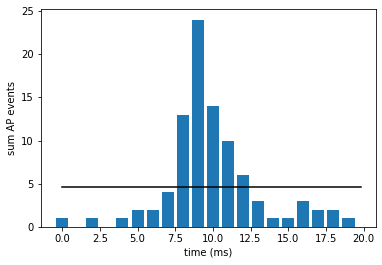

In [131]:
w = np.array([1,0,1,0,1,2,2,4,13,24,14,10,6,3,1,1,3,2,2,1])
sumw = np.sum(w)
n = np.sum(data)
xe = np.arange(0,data.shape[0]+1,1)
interp = np.arange(0,data.shape[0],.1)

#data
c = cost.ExtendedBinnedNLL(w, xe, uniform)
m = fit(c)
print(m)

#graph the data
plt.bar(bins, data)
plt.xlabel('time (ms)')
plt.ylabel('sum AP events')

plt.plot(interp[:-1], np.diff(uniform(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k')
plt.show()


## Gaussian distribution

In [132]:
def gaussianUniform(xe, s, b, mu, sigma):
    return s * n * stats.norm.cdf(xe, mu, sigma) + b * n * stats.uniform.cdf(xe, xe[0], xe[-1])

def fit(c):
    m = Minuit(c, s=0, b=0, mu=1, sigma=0.1) # initial paramters for fit
    m.limits["s", "b", "mu", "sigma"] = (0, 20) #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 11.82 (chi2/ndof = 0.7)    │              Nfcn = 293              │
│ EDM = 2.09e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

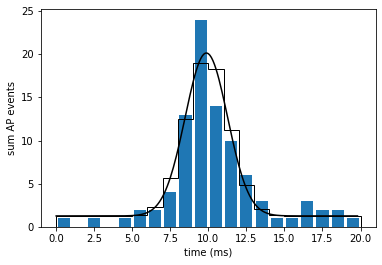

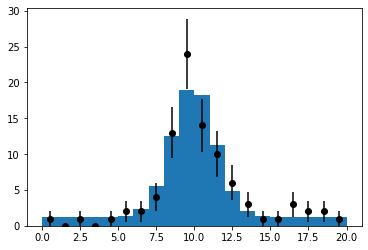

In [133]:
w = np.array([1,0,1,0,1,2,2,4,13,24,14,10,6,3,1,1,3,2,2,1])
sumw = np.sum(w)
n = np.sum(data)
xe = np.arange(0,data.shape[0]+1,1)

interp = np.arange(0,data.shape[0],.1)

#data

c = cost.ExtendedBinnedNLL(w, xe, gaussianUniform)
m = fit(c)
print(m)

#graph the data
plt.bar(xe[:-1]+0.5, w)
plt.xlabel('time (ms)')
plt.ylabel('sum AP events')

plt.stairs(np.diff(gaussianUniform(xe, *m.values)), xe, label="fit", color='k') #histogram fit

plt.plot(interp[:-1], np.diff(gaussianUniform(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit

plt.show()
m.visualize()
# plt.plot(interp[:-1], np.diff(integral(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit



## von Mises 

In [134]:
def vonMises(xe, kappa, loc, scale):
    return n * stats.vonmises.cdf(xe, kappa, loc, scale)

def fit(c):
    m = Minuit(c, kappa=1, loc=0.5, scale=0.1) # initial paramters for fit
    m.limits['kappa', 'scale'] = (0, 10)
    m.limits['loc'] = (-np.pi, np.pi) #set limits if needed
    m.migrad() #gradient descent
    assert m.valid
    return m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.86 (chi2/ndof = 0.9)    │              Nfcn = 130              │
│ EDM = 2.41e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬─────

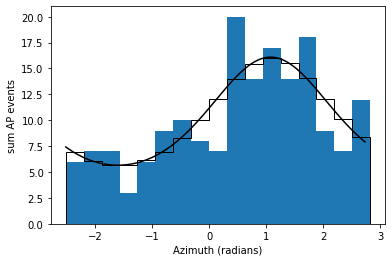

In [135]:
w = np.array([ 6.,  7.,  7.,  3.,  6.,  9., 10.,  8.,  7., 20., 14., 17., 14., 18.,  9.,  7., 12.])
# azim = np.array([-144, -126, -108, -90, -72, -54, -36, -18, 0, 18, 36, 54, 72, 90, 108, 126, 144])
azim = np.arange(-144-9, 144+10, 18)
xe = azim * (np.pi/180)
interp = np.arange(xe[0],xe[-1],.05)

#data
n = np.sum(w)
c = cost.ExtendedBinnedNLL(w, xe, vonMises)
m = fit(c)
print(m)

#print the fit parameters


#graph the data
binwidth = 18*np.pi/180
plt.bar(xe[:-1]+binwidth, w, width=binwidth)
plt.xlabel('Azimuth (radians)')
plt.ylabel('sum AP events')

plt.stairs(np.diff(vonMises(xe, *m.values)), xe+binwidth/2, label="fit", color='k') #histogram fit
plt.plot(interp[:-1]+binwidth/2, np.diff(vonMises(interp, *m.values))*interp.shape[0]/len(w), label="fit", color='k') #interpolation of histogram fit

plt.show()


## Kent distribution

In [137]:
def rodrot(targetvector, rotationaxis, angle):
    # this function does rotation of a vector in 3d space accordingly to
    # Rodrigues rotation formula.
    
    r1 = targetvector*np.cos(angle)
    r2 = np.cross(rotationaxis, targetvector) * np.sin(angle)
    r3 = rotationaxis * (np.transpose(rotationaxis) * targetvector) * (1 - np.cos(angle))
     
    return np.squeeze(r1 + r2 + r3)

def sphericalUnit(theta, phi):
    # this function gives a unit vectors of spherical coordinates.
    # the notation is based on Arfken
    # theta is polar angle
    # phi is azimuthal angle.

    st = np.sin(theta);
    ct = np.cos(theta);
    sp = np.sin(phi);
    cp = np.cos(phi);

    unitvecs = np.array([[st * cp,  ct * cp, -sp],
                [st * sp,  ct * sp,  cp],
                [ct,      -st,      0]])
    
    return unitvecs

def sph2cart(theta, phi):
    # this returns cartesian coord based on the spherical coordinates.
    # this assumes a unit circle
    return [np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]

def kent(xyz, height, beta, kappa, gamma1, gamma2, gamma3, base):
    kent_dist = height * np.exp(-kappa) * np.exp(kappa * np.dot(xyz, gamma1) + 
            beta * kappa * (np.dot(xyz, gamma2)**2 - np.dot(xyz, gamma3)**2)) - base 
    return np.squeeze(kent_dist)

def kentdist(kappa, beta, theta, phi, alpha, height, base, xyz):
    xyz = xs[:,:3]

    alpha = 45

    theta_degree = 45 
    theta = theta_degree*np.pi/180

    phi_degree = 45
    phi = (90+phi_degree)*np.pi/180

    n_samples = xyz.shape[0]

    units = sphericalUnit(theta, phi)
    gamma1 = units[:, 0]

    gamma2 = rodrot(units[:, 1], units[:, 0], alpha)
    gamma3 = rodrot(units[:, 2], units[:, 0], alpha)

    gamma1 = np.transpose(gamma1[None,None,:], [1, 2, 0])
    gamma2 = np.transpose(gamma2[None,None,:], [1, 2, 0])
    gamma3 = np.transpose(gamma3[None,None,:], [1, 2, 0])

    return kent(xyz, height, beta, kappa, gamma1, gamma2, gamma3, base)

def kentRandStartFit(c):
    kappa = np.random.uniform(low=0, high=100, size=1)
    beta = np.random.uniform(low=-0.5, high=0.5, size=1)
    theta = np.random.uniform(low=0, high=np.pi/2, size=1)
    phi =  np.random.uniform(low = -2 * np.pi, high = 2 * np.pi, size=1)
    alpha = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=1)
    
    m = Minuit(c, kappa=kappa, beta=beta, theta=theta, phi=phi, alpha=alpha) # initial paramters for fit
    m.limits['kappa'] = (0, 100)
    m.limits['beta'] = (-0.5, 0.5)
    m.limits['theta'] = (0, np.pi/2)
    m.limits['phi', 'alpha'] = (-2 * np.pi, 2 * np.pi)
    m.migrad() #gradient descent
    assert m.valid
    
    return m




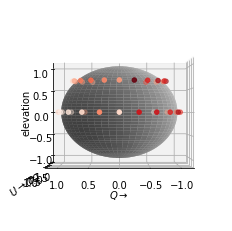

34
(54, 3)
297.0


ValueError: n must either have same dimension as xe or one extra

In [230]:
w = np.array([[ 7.,  2.,  2.,  3.,  1.,  2.,  3.,  8.,  3., 15., 15., 14., 17., 13., 10.,  6.,  2.],
              [ 6.,  7.,  7.,  3.,  6.,  9., 10.,  8.,  7., 20., 14., 17., 14., 18.,  9.,  7., 12.]])

azim = -1*np.array([-144, -126, -108, -90, -72, -54, -36, -18, 0, 18, 36, 54, 72, 90, 108, 126, 144])
elev = 90-np.array([0,40])
azim = azim*np.pi/180
elev = elev*np.pi/180

def azimElevCoord(azim, elev, data):
    corz = np.cos(elev)
    xs = np.zeros([elev.shape[0]*azim.shape[0],4])
    n=0
    
    for k in np.arange(corz.shape[0]):
        corx = np.sin(elev[k])*np.sin(azim)
        cory = np.sin(elev[k])*np.cos(azim)
        for i in np.arange(corx.shape[0]):
            xs[n,0] = corx[i]
            xs[n,1] = cory[i]
            xs[n,2] = corz[k]
            xs[n,3] = data[k,i]
            n+=1
    return xs


x, y, z = grid3d(gridsize = 200)

xs = azimElevCoord(azim, elev, w)

f = plt.figure()

ax = f.add_subplot(111, projection='3d')
xx, yy, zz, colors = list(zip(*xs))  # plot only a portion of these values
ax.scatter(1.05 * np.array(xx), 1.05 *
           np.array(yy), 1.05 * np.array(zz), c=colors, cmap='Reds', vmin=0, vmax=20)
ax.plot_surface(x, y, z, rstride=4, cstride=4,
                color='lightgray',
#             facecolors=colors, 
            linewidth=0)
ax.set_xlabel(r"$Q\rightarrow$")
ax.set_ylabel(r"$U\rightarrow$")
ax.set_zlabel('elevation')
# ax.set_zlim(0,1)
ax.view_init(0,90)
# plt.savefig(savedir + 'binned_fr_data_sphere.svg', dpi=300)
plt.show()

# interp = np.arange(azim[0],azim[-1],.1)

# xyz = xs[:,:3]

# #data
n = np.sum(w)
print(w.size)
print(xyz.shape)
print(n)
c = cost.ExtendedBinnedNLL(w, (xx, yy, zz), kentdist)
m = kentRandStartFit(c)
print(m)

# #graph the data

fitdist = kentdist(*m.values, xyz).reshape(data.shape)

# maxval = np.max(data)
# minval = 0
# plt.imshow(data, vmin=minval, vmax=maxval)
# plt.show()
# plt.imshow(fitdist, vmin=minval, vmax=maxval)
# plt.show()



# #data
# p = fitUniform(data.reshape(data.size), np.arange(data.size))
# ufit = uniform(*p, np.arange(data.size))

# plt.imshow(data, vmin=minval, vmax=maxval)
# plt.show()
# plt.imshow(ufit.reshape(data.shape), vmin=minval, vmax=maxval)
# plt.show()

# #print the fit parameters
# param_labels = ['height']
# for i, label in enumerate(param_labels):
#     print(label, ':', np.round(p[i], 4))

# kentres = chiSquaredTest(data.reshape(data.size), fitdist.reshape(fitdist.size))

# unires = chiSquaredTest(data.reshape(data.size), ufit)
